1. What is Boosting in Machine Learning?

Boosting is an ensemble learning technique that combines the predictions of multiple weak learners (typically decision trees) to create a strong learner. The key idea is to train models sequentially, where each new model focuses on correcting the errors made by the previous models. Boosting aims to reduce bias and improve the accuracy of the model.

2. How does Boosting differ from Bagging?

Training Method:
Bagging (Bootstrap Aggregating) trains multiple models independently on different subsets of the data (with replacement) and combines their predictions (averaging for regression, voting for classification).
Boosting trains models sequentially, where each model is trained to correct the errors of the previous ones.
Model Focus:

Bagging aims to reduce variance by averaging the predictions of multiple models.
Boosting aims to reduce bias by focusing on the mistakes of previous models and adjusting the weights of misclassified instances.
Final Prediction:

In Bagging, the final prediction is made by averaging or voting.
In Boosting, the final prediction is a weighted sum of the predictions from all models.


3. What is the key idea behind AdaBoost?

AdaBoost (Adaptive Boosting) is one of the first boosting algorithms. The key idea is to assign weights to each training instance and adjust these weights based on the performance of the previous models. Instances that are misclassified by the current model receive higher weights, making them more important for the next model. This process continues until a specified number of models are trained or the desired accuracy is achieved.

4. Explain the working of AdaBoost with an example
.
Initialization: Start with equal weights for all training instances.
Model Training: Train a weak learner (e.g., a decision tree stump) on the weighted dataset.
Error Calculation: Calculate the error rate of the model and determine its weight based on its performance.
Weight Update: Increase the weights of misclassified instances and decrease the weights of correctly classified instances.
Repeat: Repeat the process for a specified number of iterations or until the error is minimized.
Final Prediction: The final model is a weighted sum of the predictions from all weak learners.
Example: Suppose we have a dataset with instances labeled as positive or negative. In the first iteration, a weak learner might misclassify some positive instances as negative. In the next iteration, AdaBoost will increase the weights of those misclassified instances, forcing the next weak learner to focus more on them. This process continues, and the final model combines the predictions of all weak learners, giving more influence to those that performed better.

5. What is Gradient Boosting, and how is it different from AdaBoost?

Gradient Boosting is another boosting technique that builds models sequentially, but instead of adjusting weights based on misclassification, it fits new models to the residual errors of the previous models. The key difference is that Gradient Boosting minimizes a loss function (e.g., mean squared error) by adding new models that predict the residuals (errors) of the existing ensemble.

6. What is the loss function in Gradient Boosting?

The loss function in Gradient Boosting measures how well the model's predictions match the actual target values. Common loss functions include:

Mean Squared Error (MSE): Used for regression tasks.
Log Loss (Cross-Entropy Loss): Used for binary classification tasks.
Hinge Loss: Used for support vector machines.
Gradient Boosting optimizes this loss function by fitting new models to the gradients (residuals) of the loss function.

7. How does XGBoost improve over traditional Gradient Boosting?

XGBoost (Extreme Gradient Boosting) improves upon traditional Gradient Boosting in several ways:

Regularization: XGBoost includes L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting.
Parallel Processing: It can perform parallel computations, making it faster than traditional implementations.
Tree Pruning: XGBoost uses a more efficient tree pruning algorithm that allows for better handling of complex datasets.
Handling Missing Values: It has built-in mechanisms to handle missing values effectively.

8. What is the difference between XGBoost and CatBoost?

XGBoost: Primarily designed for numerical features and requires preprocessing for categorical features (e.g., one-hot encoding).
CatBoost: Specifically designed to handle categorical features without extensive preprocessing. It uses a technique called "ordered boosting" to reduce overfitting and improve performance on datasets with categorical variables.

9. What are some real-world applications of Boosting techniques?

Boosting techniques are widely used in various applications, including:

Finance: Credit scoring and risk assessment.
Healthcare: Disease diagnosis and prediction.
Marketing: Customer segmentation and targeting.
Image Recognition: Object detection and classification.
Natural Language Processing: Sentiment analysis and spam detection.


10. How does regularization help in XGBoost?

Regularization in XGBoost helps to prevent overfitting by adding a penalty term to the loss function. This penalty discourages overly complex models by controlling the size of the coefficients (weights) assigned to features. By tuning the regularization parameters (L1 and L2), users can achieve a better balance between bias and variance, leading to improved generalization on unseen data.

11. What are some hyperparameters to tune in Gradient Boosting models?

Some important hyperparameters to tune in Gradient Boosting models include:

Learning Rate: Controls the contribution of each tree to the final prediction.
Number of Estimators: The number of trees in the ensemble.
Max Depth: The maximum depth of each tree, controlling model complexity.
Min Samples Split: The minimum number of samples required to split an internal node.
Subsample: The fraction of samples to be used for fitting individual base learners.

12. What is the concept of Feature Importance in Boosting?

Feature Importance in boosting refers to the technique of ranking the features based on their contribution to the model's predictions . In boosting algorithms, feature importance can be derived from the number of times a feature is used to split the data across all trees, as well as the improvement in the loss function that results from those splits. Features that lead to greater reductions in the loss function or are used more frequently are considered more important. This information can help in understanding the model and in feature selection for improving model performance.

13. Why is CatBoost efficient for categorical data?

CatBoost is efficient for categorical data because it natively handles categorical features without the need for extensive preprocessing, such as one-hot encoding. It uses a technique called "ordered boosting," which helps to reduce overfitting by using a permutation-based approach to calculate statistics for categorical features. This allows CatBoost to effectively capture the relationships between categorical variables and the target variable, leading to better performance on datasets with many categorical features. Additionally, CatBoost can automatically determine the best way to encode these features, making it user-friendly and efficient for practitioners working with categorical data.

1. Train an AdaBoost Classifier on a sample dataset and print model accuracy

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an AdaBoost Classifier
# The 'base_estimator' argument has been replaced with 'estimator'
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
ada_model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 1.00


2. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

In [7]:
from sklearn.datasets import fetch_california_housing # or fetch_openml for Ames housing dataset

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Load the Boston housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an AdaBoost Regressor
# Replace 'base_estimator' with 'estimator'
ada_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=50)
ada_regressor.fit(X_train, y_train)

# Predict and evaluate MAE
y_pred = ada_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.30


3. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100)
gb_classifier.fit(X_train, y_train)

# Print feature importance scores
feature_importances = gb_classifier.feature_importances_
for i, score in enumerate(feature_importances):
    print(f'Feature {cancer.feature_names[i]}: {score:.4f}')

Feature mean radius: 0.0003
Feature mean texture: 0.0195
Feature mean perimeter: 0.0002
Feature mean area: 0.0000
Feature mean smoothness: 0.0031
Feature mean compactness: 0.0020
Feature mean concavity: 0.0014
Feature mean concave points: 0.4507
Feature mean symmetry: 0.0001
Feature mean fractal dimension: 0.0003
Feature radius error: 0.0075
Feature texture error: 0.0036
Feature perimeter error: 0.0017
Feature area error: 0.0076
Feature smoothness error: 0.0009
Feature compactness error: 0.0021
Feature concavity error: 0.0158
Feature concave points error: 0.0020
Feature symmetry error: 0.0015
Feature fractal dimension error: 0.0010
Feature worst radius: 0.0755
Feature worst texture: 0.0482
Feature worst perimeter: 0.0515
Feature worst area: 0.0378
Feature worst smoothness: 0.0048
Feature worst compactness: 0.0005
Feature worst concavity: 0.0175
Feature worst concave points: 0.2408
Feature worst symmetry: 0.0022
Feature worst fractal dimension: 0.0000


4. Train a Gradient Boosting Regressor and evaluate using R-Squared Score

In [10]:
from sklearn.datasets import fetch_california_housing # or fetch_openml for Ames housing dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California housing dataset instead of the Boston dataset
# housing = load_boston()  # This line is removed
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100)
gb_regressor.fit(X_train, y_train)

# Predict and evaluate R-Squared Score
y_pred = gb_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-Squared Score: {r2:.2f}')

R-Squared Score: 0.78


5. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100)
gb_classifier.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Model Accuracy: {accuracy_gb:.2f}')

# Train an XGBoost Classifier
xg_classifier = xgb.XGBClassifier(n_estimators=100)
xg_classifier.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_xg = xg_classifier.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(f'XGBoost Model Accuracy: {accuracy_xg:.2f}')
gb_classifier = GradientBoostingClassifier(n_estimators=100)
gb_classifier.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Model Accuracy: {accuracy_gb:.2f}')

# Train an XGBoost Classifier
xg_classifier = xgb.XGBClassifier(n_estimators=100)
xg_classifier.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_xg = xg_classifier.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(f'XGBoost Model Accuracy: {accuracy_xg:.2f}')

Gradient Boosting Model Accuracy: 0.96
XGBoost Model Accuracy: 0.96
Gradient Boosting Model Accuracy: 0.96
XGBoost Model Accuracy: 0.96


6. Train a CatBoost Classifier and evaluate using F1-Score

In [16]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a CatBoost Classifier
cat_classifier = CatBoostClassifier(iterations=100, verbose=0)
cat_classifier.fit(X_train, y_train)

# Predict and evaluate F1-Score
y_pred_cat = cat_classifier.predict(X_test)
f1 = f1_score(y_test, y_pred_cat)
print(f'F1-Score: {f1:.2f}')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00
F1-Score: 0.97


7. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)


In [19]:
!pip install catboost
# Import necessary libraries
from sklearn.datasets import fetch_california_housing  # Use fetch_california_housing instead of load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Load the California housing dataset instead of the Boston dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Regressor
xg_regressor = xgb.XGBRegressor(n_estimators=100)
xg_regressor.fit(X_train, y_train)

# Predict and evaluate MSE
y_pred_xg_reg = xg_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xg_reg)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.22


8. Train an AdaBoost Classifier and visualize feature importance

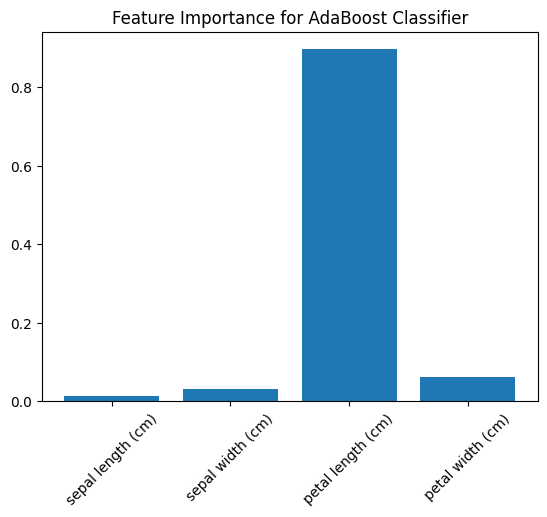

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an AdaBoost Classifier
# Replace 'base_estimator' with 'estimator'
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
ada_model.fit(X_train, y_train)

# Visualize feature importance
feature_importances = ada_model.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), iris.feature_names, rotation=45)
plt.title('Feature Importance for AdaBoost Classifier')
plt.show()

9. Train a Gradient Boosting Regressor and plot learning curves

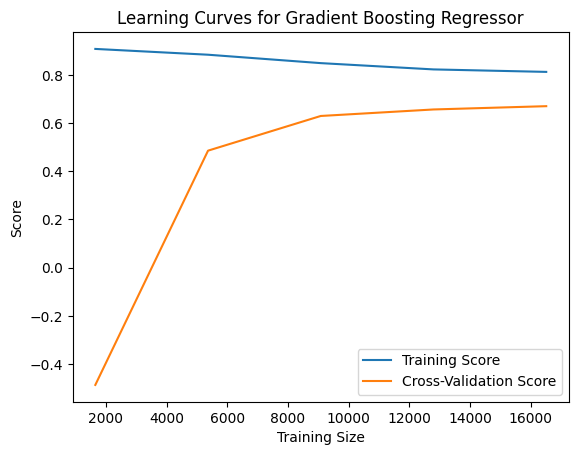

In [24]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import fetch_california_housing # or fetch_openml for Ames housing dataset
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Load the California housing dataset instead of the Boston dataset
housing = fetch_california_housing() # load_boston() is deprecated and removed
X = housing.data
y = housing.target

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(gb_regressor, X, y, cv=5, n_jobs=-1)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.title('Learning Curves for Gradient Boosting Regressor')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

10. Train an XGBoost Classifier and visualize feature importance

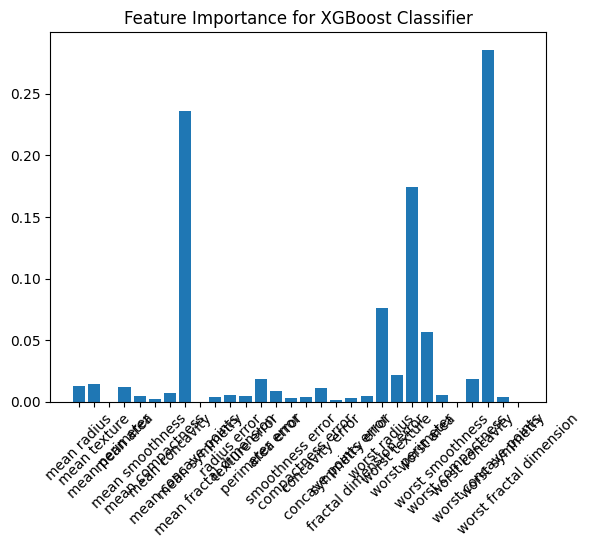

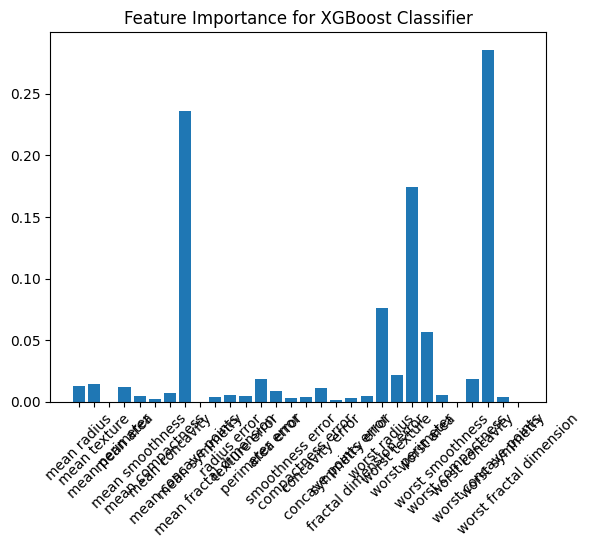

In [25]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Classifier
import xgboost as xgb
xg_classifier = xgb.XGBClassifier(n_estimators=100)
xg_classifier.fit(X_train, y_train)

# Visualize feature importance
import matplotlib.pyplot as plt
xg_importances = xg_classifier.feature_importances_
plt.bar(range(len(xg_importances)), xg_importances)
plt.xticks(range(len(xg_importances)), cancer.feature_names, rotation=45)
plt.title('Feature Importance for XGBoost Classifier')
plt.show()
xg_classifier = xgb.XGBClassifier(n_estimators=100)
xg_classifier.fit(X_train, y_train)

# Visualize feature importance
xg_importances = xg_classifier.feature_importances_
plt.bar(range(len(xg_importances)), xg_importances)
plt.xticks(range(len(xg_importances)), cancer.feature_names, rotation=45)
plt.title('Feature Importance for XGBoost Classifier')
plt.show()

11. Train a CatBoost Classifier and plot the confusion matrix

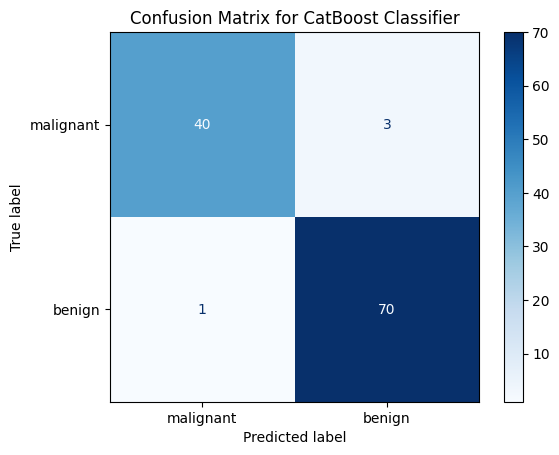

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a CatBoost Classifier
cat_classifier = CatBoostClassifier(iterations=100, verbose=0)
cat_classifier.fit(X_train, y_train)

# Predict and plot confusion matrix
y_pred_cat = cat_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_cat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

12. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

Accuracy with 10 estimators: 1.00
Accuracy with 50 estimators: 1.00
Accuracy with 100 estimators: 1.00
Accuracy with 200 estimators: 1.00


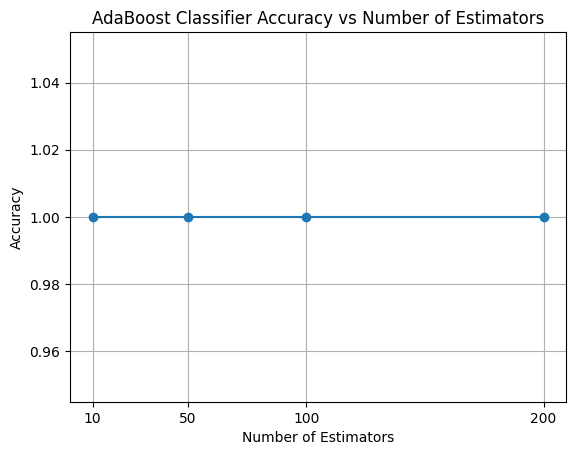

In [28]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare accuracy with different numbers of estimators
n_estimators = [10, 50, 100, 200]
accuracies = []

for n in n_estimators:
    # Replace 'base_estimator' with 'estimator'
    ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=n)
    ada_model.fit(X_train, y_train)
    y_pred = ada_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with {n} estimators: {accuracy:.2f}')

# Plot the results
plt.plot(n_estimators, accuracies, marker='o')
plt.title('AdaBoost Classifier Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(n_estimators)
plt.grid()
plt.show()

13. Train a Gradient Boosting Classifier and visualize the ROC curve

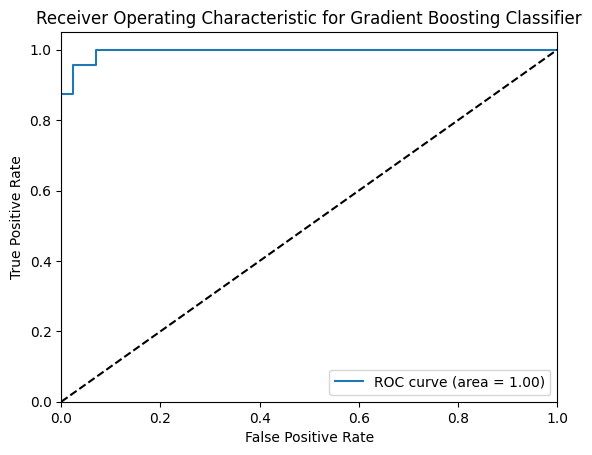

In [29]:
from sklearn.metrics import roc_curve, auc

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100)
gb_classifier.fit(X_train, y_train)

# Predict probabilities and compute ROC curve
y_prob = gb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()

14. Train an XGBoost Regressor and tune the learning rate using GridSearchCV

In [33]:
from sklearn.datasets import fetch_california_housing # or fetch_openml for Ames housing dataset

# ... (rest of your code) ...

# Load the California housing dataset instead of the Boston dataset
housing = fetch_california_housing()  # Replace load_boston() with fetch_california_housing()
X = housing.data
y = housing.target

# ... (rest of your code) ...

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the parameter grid for learning rate tuning
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3], 'n_estimators': [100, 200, 300]}
xg_regressor = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=xg_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Mean Squared Error: {best_score:.2f}')

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best Mean Squared Error: 0.21


15. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a CatBoost Classifier without class weighting
cat_classifier = CatBoostClassifier(iterations=100, verbose=0)
cat_classifier.fit(X_train, y_train)
y_pred = cat_classifier.predict(X_test)
print("Classification Report without class weighting:")
print(classification_report(y_test, y_pred))

# Train a CatBoost Classifier with class weighting
cat_classifier_weighted = CatBoostClassifier(iterations=100, class_weights=[1, 9], verbose=0)
cat_classifier_weighted.fit(X_train, y_train)
y_pred_weighted = cat_classifier_weighted.predict(X_test)
print("Classification Report with class weighting:")
print(classification_report(y_test, y_pred_weighted))

Classification Report without class weighting:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       180
           1       1.00      0.55      0.71        20

    accuracy                           0.95       200
   macro avg       0.98      0.78      0.84       200
weighted avg       0.96      0.95      0.95       200

Classification Report with class weighting:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       180
           1       0.63      0.60      0.62        20

    accuracy                           0.93       200
   macro avg       0.79      0.78      0.79       200
weighted avg       0.92      0.93      0.92       200



16. Train an AdaBoost Classifier and analyze the effect of different learning rates

Accuracy with learning rate 0.01: 1.00
Accuracy with learning rate 0.1: 1.00
Accuracy with learning rate 1.0: 1.00


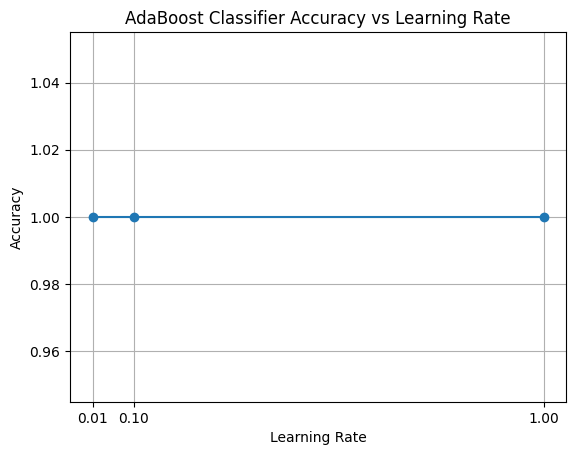

In [37]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare accuracy with different learning rates
learning_rates = [0.01, 0.1, 1.0]
accuracies = []

for lr in learning_rates:
    # Replace 'base_estimator' with 'estimator'
    ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=lr)
    ada_model.fit(X_train, y_train)  # Indented this line
    y_pred = ada_model.predict(X_test)  # Indented this line
    accuracy = accuracy_score(y_test, y_pred)  # Indented this line
    accuracies.append(accuracy)  # Indented this line
    print(f'Accuracy with learning rate {lr}: {accuracy:.2f}')  # Indented this line

# Plot the results
plt.plot(learning_rates, accuracies, marker='o')
plt.title('AdaBoost Classifier Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.grid()
plt.show()

17. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Classifier for multi-class classification
xg_classifier = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
xg_classifier.fit(X_train, y_train)

# Predict probabilities and evaluate log-loss
y_prob = xg_classifier.predict_proba(X_test)
loss = log_loss(y_test, y_prob)
print(f'Log-Loss: {loss:.2f}')

Log-Loss: 0.01


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:52:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
